# Example

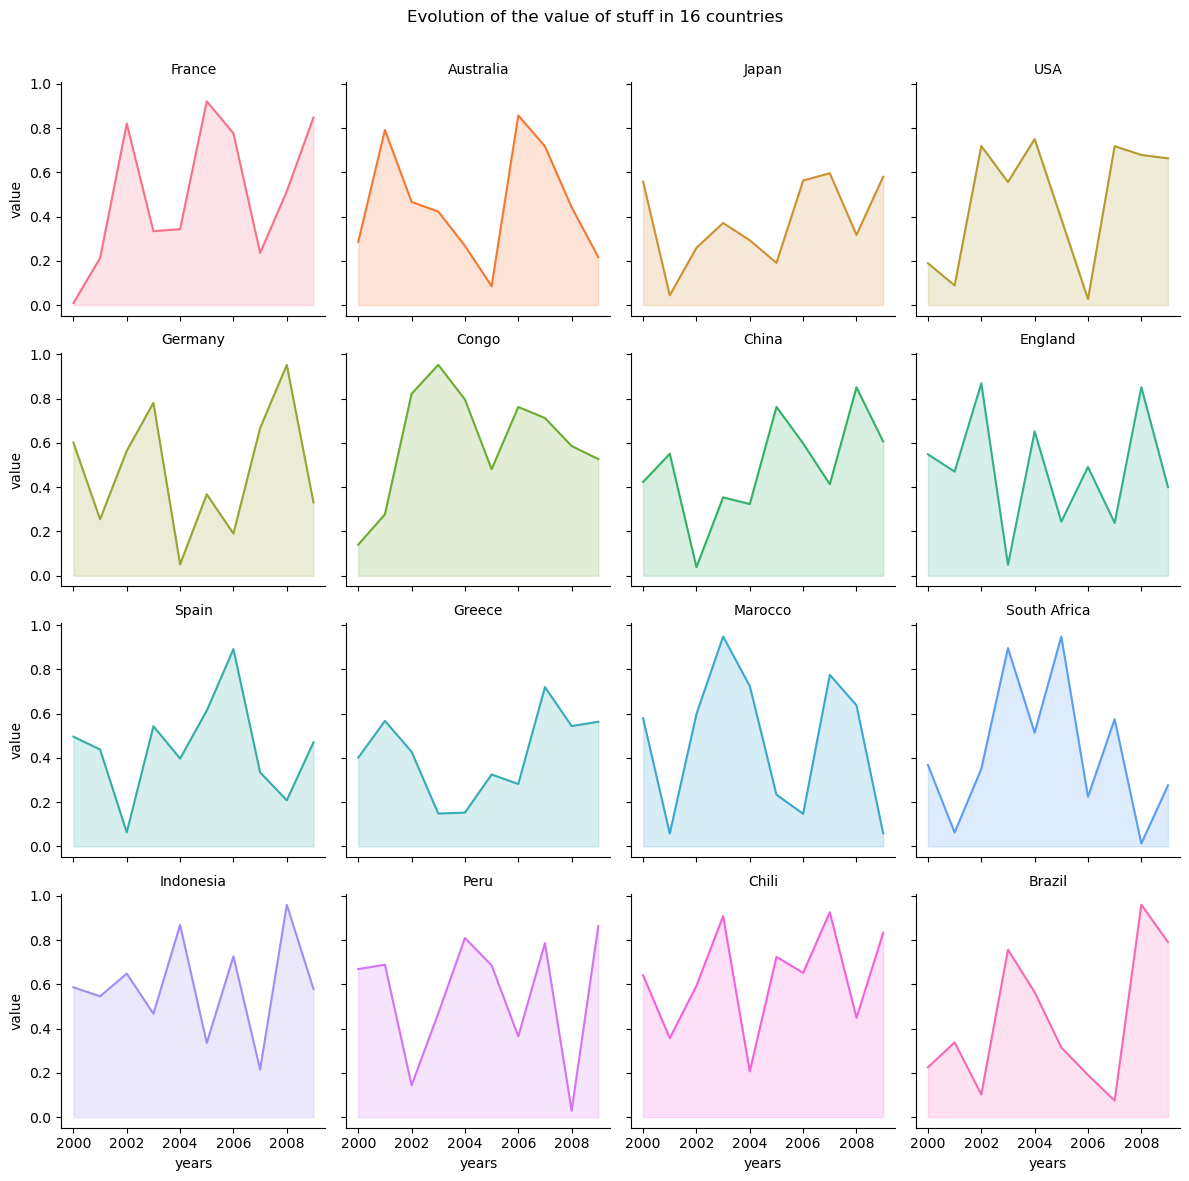

In [1]:
# libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
 
# Create a dataset
my_count=["France","Australia","Japan","USA","Germany","Congo","China","England","Spain","Greece","Marocco","South Africa","Indonesia","Peru","Chili","Brazil"]
df = pd.DataFrame({
"country":np.repeat(my_count, 10),
"years":list(range(2000, 2010)) * 16,
"value":np.random.rand(160)
})
 
# Create a grid : initialize it
g = sns.FacetGrid(df, col='country', hue='country', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'years', 'value')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'years', 'value', alpha=0.2).set_titles("{col_name} country")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')

# Show the graph
plt.show()

# Carregando dados

In [2]:
df = pd.read_csv('../data/letterboxd_Curitiba.csv')

In [3]:
df['Release_year'] = pd.to_datetime(df['Release_year'], format='%Y')
df

Film_title Release_year                   Director  \
0                  Aqui e Agora   2024-01-01             Vinícius Dórea   
1                 Junho de 2002   2024-01-01                 Tainá Lima   
2                      Mergulho   2023-01-01   Breno Silva, Wilson Neto   
3                    Sétimo Dia   2023-01-01  Vinícius Dórea, João Ives   
4                       Maestro   2023-01-01             Bradley Cooper   
...                         ...          ...                        ...   
32097  Inception: The Cobol Job   2010-01-01                  Ian Kirby   
32098                     Saint   2010-01-01                  Dick Maas   
32099                The Shrine   2010-01-01                 Jon Knautz   
32100          The Piano Forest   2007-01-01            Masayuki Kojima   
32101           Thru the Mirror   1936-01-01                 David Hand   

                                                    Cast  Average_rating  \
0      ['Andrey Icaro', 'Letícia Silva', 'Vivian Evel...             NaN   
1                                                    NaN             NaN   
2      ['Benício Júnior', 'Pedro Bagano', 'Lívia Mari...             NaN   
3      ['Ligia Borges', 'Raianny Ferreira', 'Vivian E...             NaN   
4      ['Carey Mulligan', 'Bradley Cooper', 'Matt Bom...            3.15   
...                                                  ...             ...   
32097  ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...            3.59   
32098  ['Huub Stapel', 'Egbert Jan Weeber', 'Caro Len...            2.71   
32099  ['Aaron Ashmore', 'Cindy Sampson', 'Meghan Hef...            2.67   
32100  ['Aya Ueto', 'Hiroyuki Amano', 'Mayuko Fukuda'...            3.58   
32101  ['Walt Disney', 'Billy Bletcher', 'Pinto Colvi...            3.73   

       Curitiba_average_rating  \
0                          NaN   
1                          NaN   
2                     3.250000   
3                          NaN   
4                     3.024038   
...                        ...   
32097                      NaN   
32098                      NaN   
32099                      NaN   
32100                 5.000000   
32101                      NaN   

                                                  Genres  Runtime  \
0                                        ['Documentary']      6.0   
1                                                    NaN      9.0   
2                                          ['Adventure']     24.0   
3                                              ['Drama']     22.0   
4                          ['Drama', 'Music', 'Romance']    129.0   
...                                                  ...      ...   
32097  ['Thriller', 'Animation', 'Action', 'Science F...     14.0   
32098                               ['Comedy', 'Horror']     85.0   
32099                                         ['Horror']     85.0   
32100                    ['Music', 'Animation', 'Drama']    101.0   
32101                 ['Comedy', 'Animation', 'Fantasy']      9.0   

                    Countries Original_language  ...       ★★      ★★½  \
0                  ['Brazil']        Portuguese  ...      0.0      0.0   
1      ['Brazil', 'Portugal']        Portuguese  ...      0.0      0.0   
2                  ['Brazil']        Portuguese  ...      0.0      0.0   
3                  ['Brazil']        Portuguese  ...      0.0      0.0   
4                     ['USA']           English  ...  27135.0  35923.0   
...                       ...               ...  ...      ...      ...   
32097           ['UK', 'USA']           English  ...    107.0    170.0   
32098         ['Netherlands']             Dutch  ...    721.0    690.0   
32099              ['Canada']           English  ...    741.0    709.0   
32100               ['Japan']          Japanese  ...     87.0    175.0   
32101                 ['USA']           English  ...    135.0    189.0   

           ★★★     ★★★½     ★★★★    ★★★★½    ★★★★★  Total_ratings  \
0          

# Gêneros

In [4]:
df = df.dropna(subset=['Genres', 'Release_year']).reset_index(drop=True)

In [5]:
set_genres = {'Animation', 'Comedy', 'Action', 'War', 'Music', 'TV Movie', 'Western', 'Family', 'Documentary', 'Romance', 'Drama', 'Thriller', 'Horror', 'Fantasy', 'Science Fiction', 'Crime'}
list_genres = ['Animation', 'Comedy', 'Action', 'War', 'Music', 'TV Movie', 'Western', 'Family', 'Documentary', 'Romance', 'Drama', 'Thriller', 'Horror', 'Fantasy', 'Science Fiction', 'Crime']

# Organizando os dados

In [6]:
df = df[['Release_year', 'Genres']].reset_index(drop=True)

In [7]:
df_g = pd.DataFrame({
"Genre":np.repeat(list_genres, 100),
"Release_year":list(range(1924, 2024)) * 16,
"Count":np.zeros(100 * 16)
}).set_index(['Genre', 'Release_year'])
df_g

rel_count = np.zeros(100)

#df_y = pd.DataFrame({
#"Release_year": list(range(1924, 2024)),
#"Count": np.zeros(100)
#}).set_index('Release_year')

In [8]:
for index, row in df.iterrows():
    y = row['Release_year'].year
    if y > 1923 and y < 2024:
        rel_count[y - 1924] += 1
        film_genres = row['Genres'].strip('][').replace('\'', '').split(', ')
        for g in film_genres:
            if g in set_genres:
                df_g.loc[(g, y)] += 1

In [9]:
for index, row in df_g.iterrows():
    #print(index[1])
    df_g.loc[index] /= rel_count[index[1] - 1924]

In [10]:
df_g.reset_index(inplace = True)

# Gráfico facet

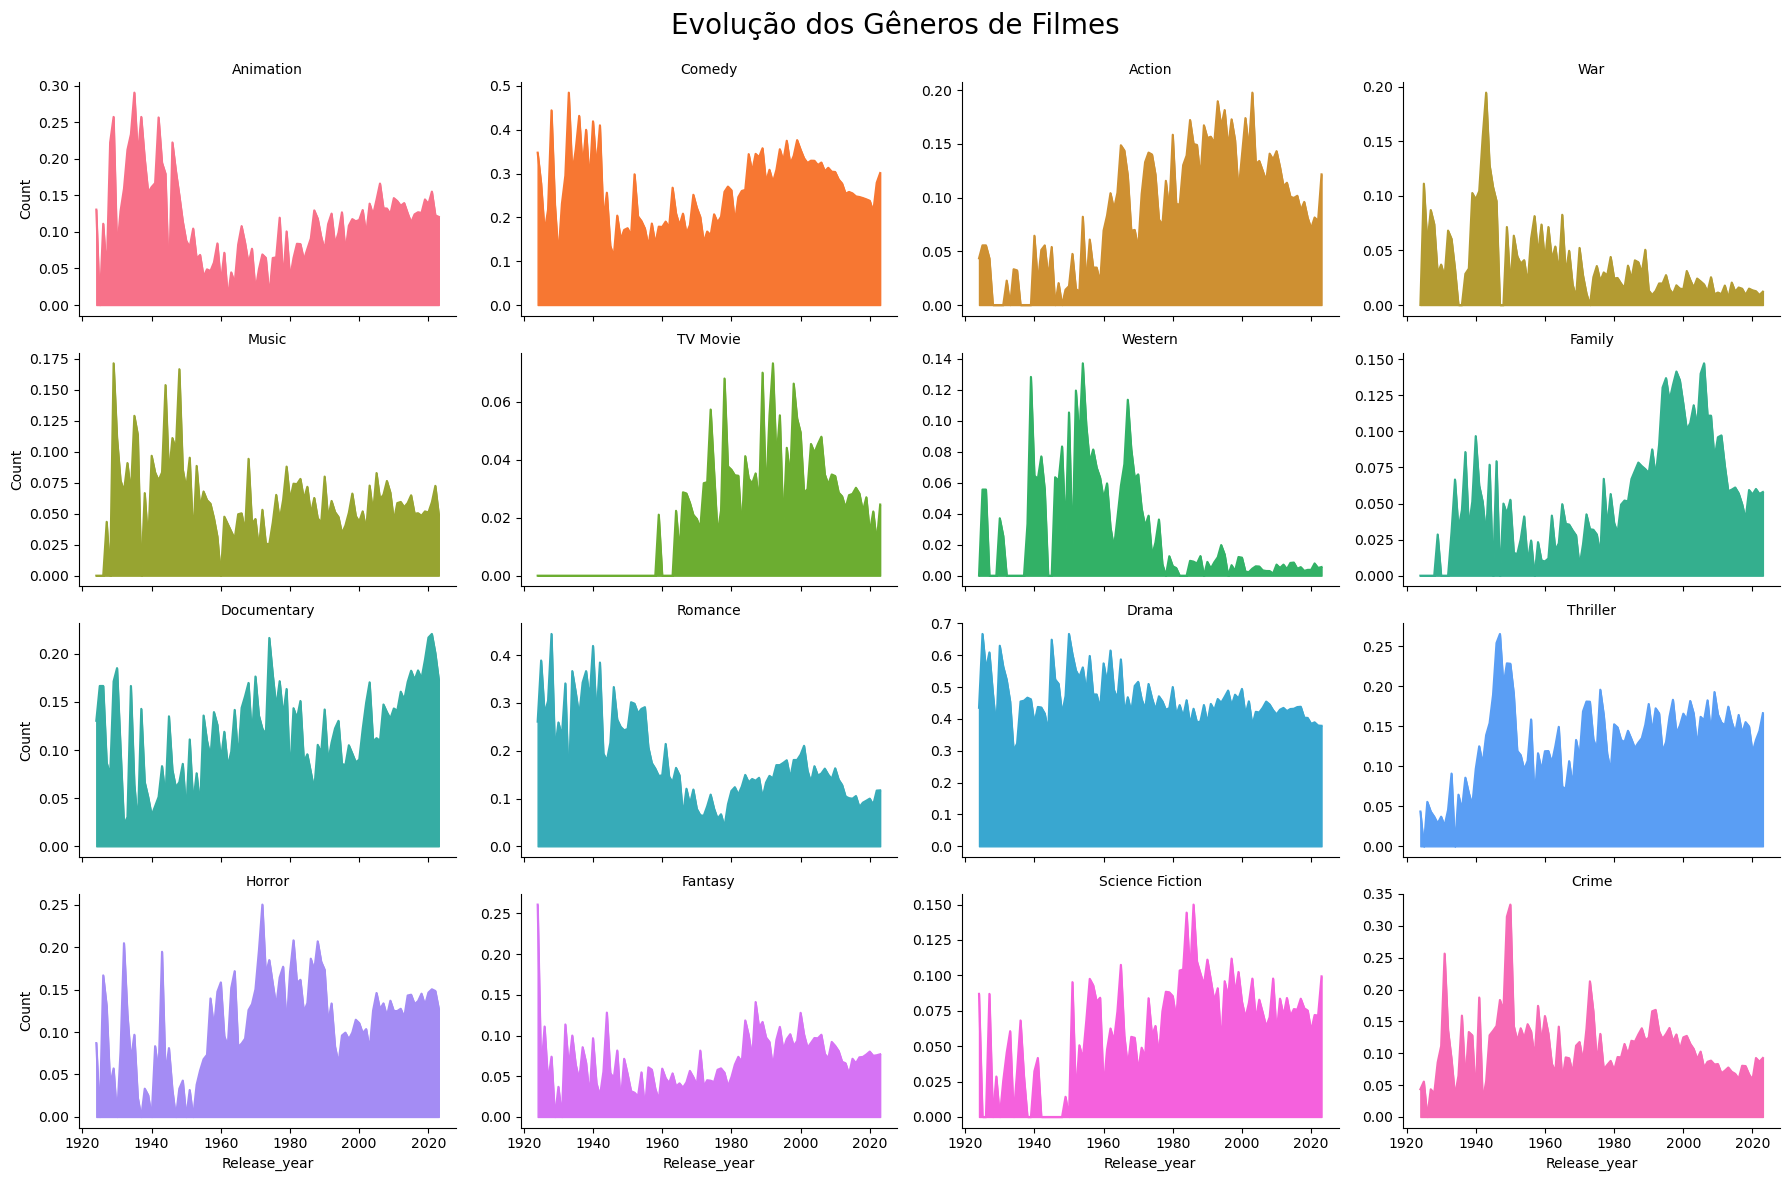

In [11]:
# Create a grid : initialize it
g = sns.FacetGrid(df_g, col='Genre', hue='Genre', col_wrap=4, aspect = 1.5, sharey = False)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'Release_year', 'Count')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Release_year', 'Count', alpha=1).set_titles("{col_name} Gênero")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolução dos Gêneros de Filmes', size = 20)

# Show the graph
plt.show()

# Rolling Average

In [12]:
df_rolling = df_g.copy()

In [13]:
df_tmp = df_rolling[['Release_year', 'Count']].rolling(window = 3, on = 'Release_year').mean()
df_rolling['Count'] = df_tmp['Count']
df_rolling = df_rolling[df_rolling['Release_year'] > 1925]

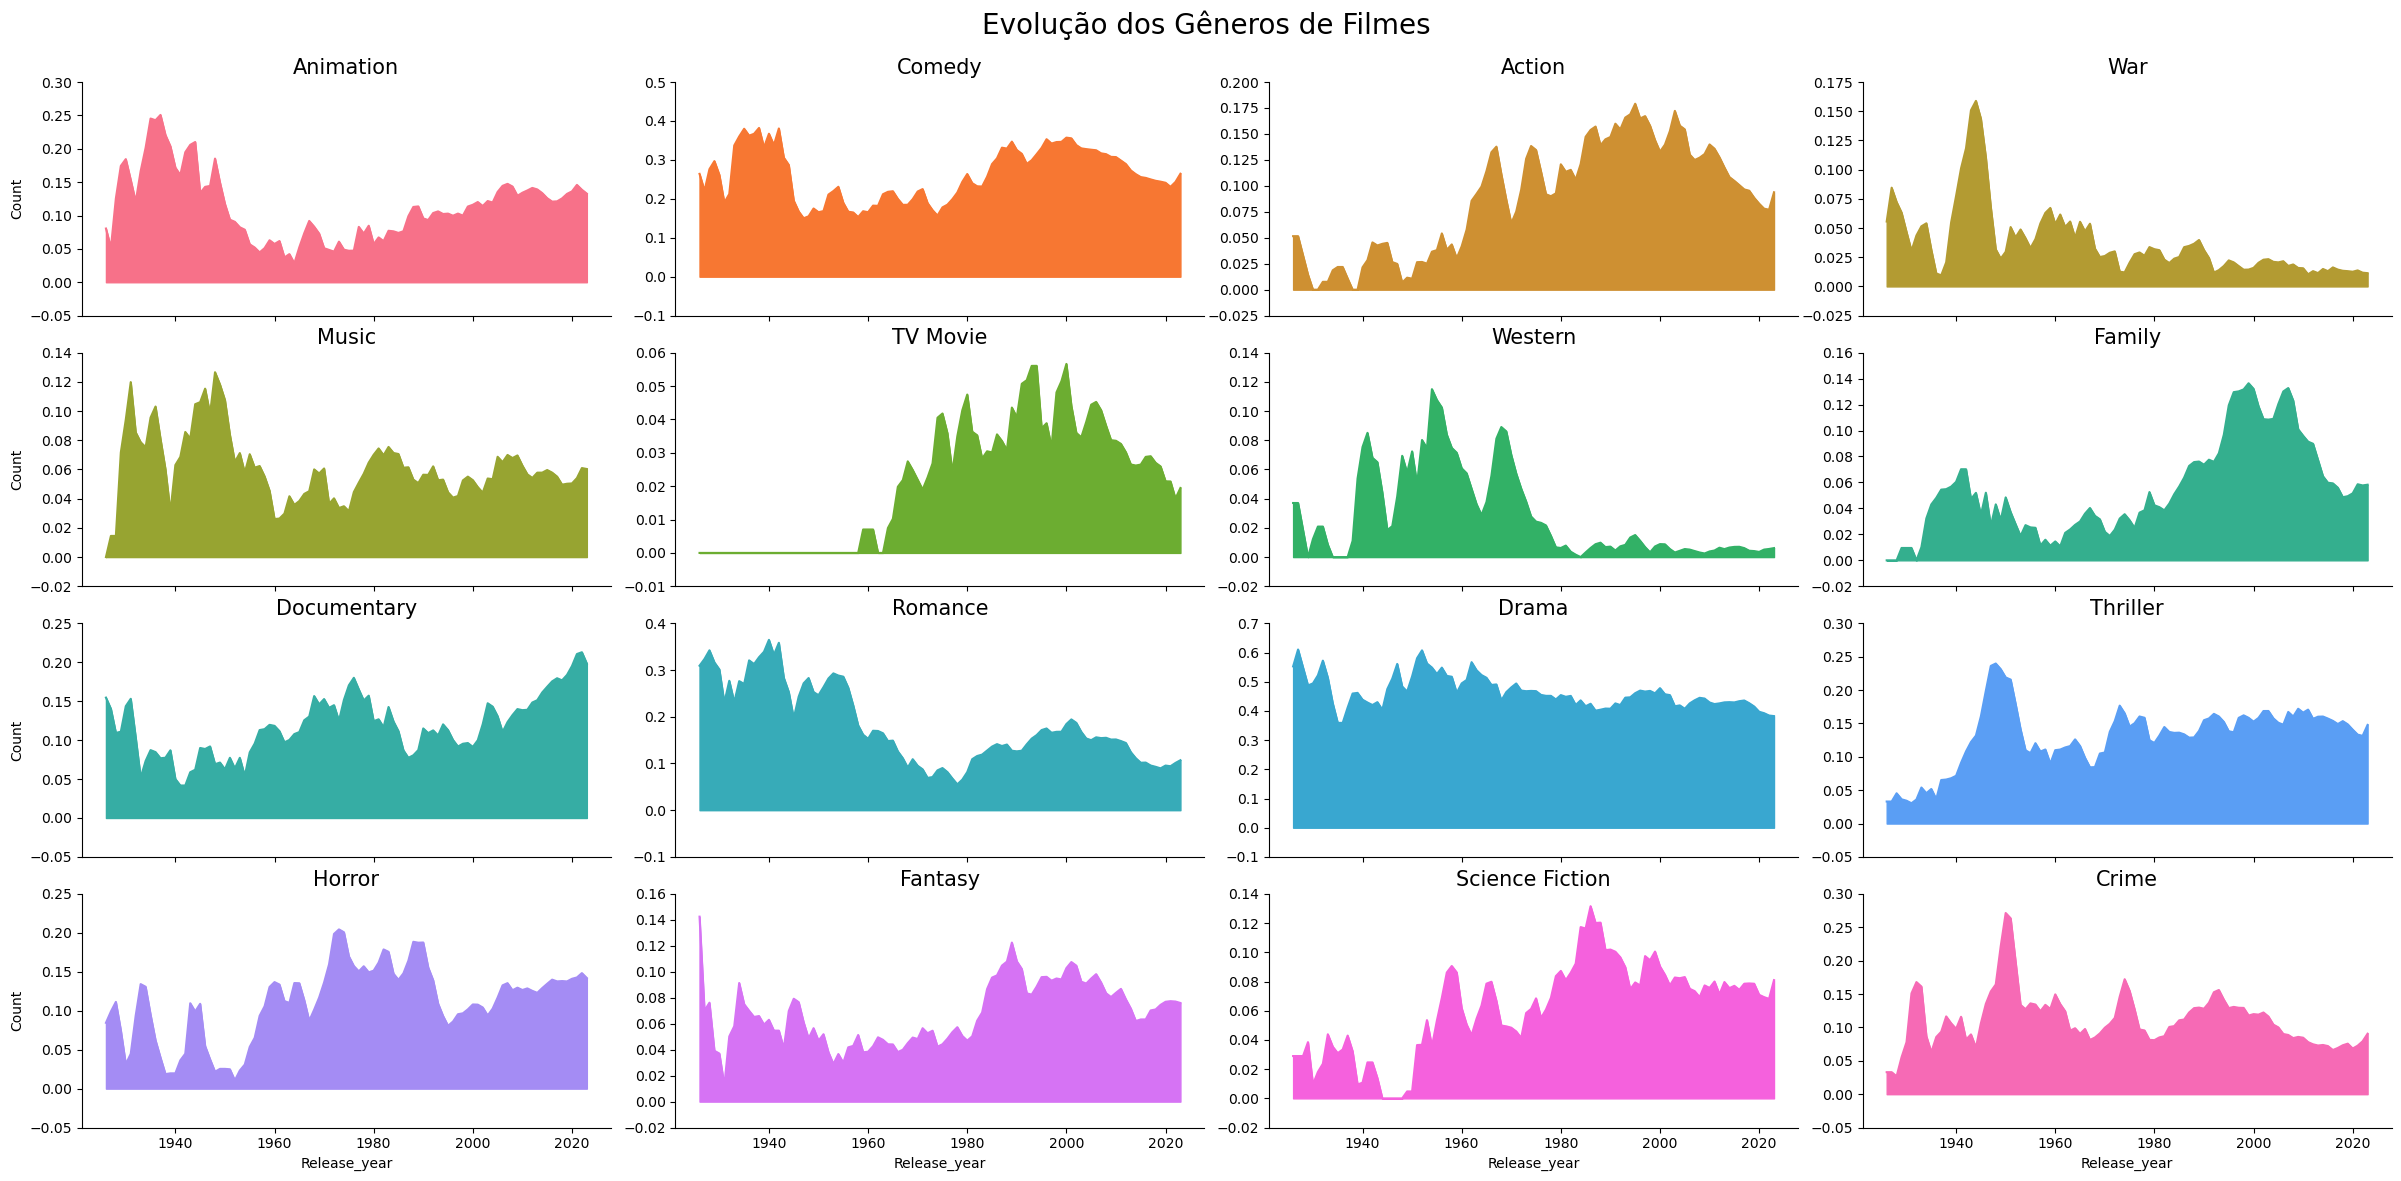

In [18]:
# Create a grid : initialize it
g = sns.FacetGrid(df_rolling, col='Genre', hue='Genre', col_wrap=4, aspect = 2, sharey = False)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'Release_year', 'Count')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Release_year', 'Count', alpha=1).set_titles("{col_name} Gênero")
 
# Control the title of each facet
g = g.set_titles("{col_name}", size = 15)

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolução dos Gêneros de Filmes', size = 20)

plt.savefig('grade_gêneros')

# Show the graph
plt.show()

# Stacked Area graph